In [4]:
import sys
import os

sys.path.insert(1, os.path.join(sys.path[0], '..')) 

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import numpy as np
import yaml
from pathlib import Path
import math

import simulation
import stats
import gsr

# Configure simulation settings

<b>Set path to simlation config file (yaml) and load the simulation config into a Python dictionary</b>

Using the config, we set all the settings which we will use for our simulation.
* `random_seed`: this allows another user to replicate the results of running the simulations
* `n_experiments`: the number of times we run a simulation. E.g.: when n_experiments = 20, the simulation will be ran 20 times repeatedly
* `n_cards`: the number of cards in the deck
* `max_riffle_shuffles`: maximum number of riffle shuffles performed per experiment

In [3]:
simulation_config_name = "simulation_config.yml"
simulation_config_folder = Path('../config')
simulation_config_path = simulation_config_folder / simulation_config_name

In [4]:
with open(simulation_config_path, "r") as f:
    cfg_load = yaml.safe_load(f)

In [5]:
cfg = cfg_load['simulation_config']
riffle_shuffle_cfg = cfg['riffle_shuffle']

In [6]:
RANDOM_SEED = cfg['random_seed'] 
N_TRIALS = riffle_shuffle_cfg['n_trials']
N_CARDS = riffle_shuffle_cfg['n_cards']
MAX_RIFFLE_SHUFFLES = riffle_shuffle_cfg['max_riffle_shuffles']

# Run riffle shuffle simulation

Based on the configuration file, the code block below performs a number of trials, which simulate a number of riffle shuffles, performed on a deck of `n_cards` cards. For each trial, the shuffled decks are saved in a list of lists; `results`. 

In [7]:
# set random seed for reproducable results
np.random.seed(RANDOM_SEED)

results = simulation.riffle_shuffle_simulation(
    n_trials=N_TRIALS,
    max_n_riffle_shuffle=MAX_RIFFLE_SHUFFLES,
    n_cards_in_deck=N_CARDS
    )

# Simulation results 

The results list holds `n_trials` number of lists. Each trial is a list of shuffled decks, each deck representing the state of the deck after one subsequent riffle shuffle.
Meaning, for a specific trial: 
- the first deck is the arrangement of the deck after one riffle shuffle (k=1)
- the second deck is the arrangement of the deck after a second riffle shuffle (k=2)
- .... 
- the last deck in is the arrangement of the deck after `max_n_riffle_shuffle` riffle shuffles

In [8]:
# Show all the shuffled decks in the first trial
results[0]

[deque([25, 26, 1, 2, 27, 3, 28, 29, 30, 4, 31, 5, 6, 7, 8, 9, 10, 11, 12, 32, 13, 14, 33, 15, 16, 34, 17, 35, 36, 37, 38, 39, 40, 41, 42, 43, 18, 44, 19, 20, 45, 46, 47, 21, 48, 22, 49, 50, 23, 24, 51, 52]),
 deque([36, 25, 26, 37, 1, 2, 27, 38, 39, 40, 3, 41, 28, 29, 30, 42, 43, 18, 4, 44, 31, 5, 19, 6, 7, 20, 45, 8, 46, 9, 10, 11, 47, 12, 21, 32, 48, 22, 13, 49, 14, 50, 33, 23, 15, 24, 16, 51, 52, 34, 17, 35]),
 deque([45, 36, 8, 25, 46, 26, 9, 10, 37, 1, 11, 2, 27, 47, 38, 12, 39, 40, 21, 3, 41, 28, 32, 48, 29, 22, 30, 13, 49, 42, 14, 43, 50, 33, 18, 4, 23, 15, 24, 16, 44, 31, 5, 19, 51, 52, 6, 7, 20, 34, 17, 35]),
 deque([45, 36, 29, 8, 22, 30, 13, 49, 42, 14, 43, 50, 33, 18, 25, 46, 26, 9, 10, 4, 37, 1, 23, 15, 11, 24, 2, 16, 27, 44, 31, 47, 5, 19, 51, 38, 52, 6, 12, 39, 7, 20, 34, 17, 40, 21, 3, 35, 41, 28, 32, 48]),
 deque([45, 36, 29, 8, 22, 16, 27, 30, 13, 44, 49, 42, 31, 47, 5, 19, 14, 51, 43, 38, 52, 6, 50, 33, 12, 39, 7, 18, 20, 34, 25, 17, 40, 21, 46, 26, 3, 35, 9, 10, 4,

To compute the probability that a deck is in a specific arrangement (permutation) we need to extract the number of rising sequences.

In [9]:
rising_sequences_per_trial = []

for trial in results:
    rising_sequences_in_each_trial = [shuffled_deck.rising_sequences for shuffled_deck in trial]
    rising_sequences_per_trial.append(rising_sequences_in_each_trial)

In [10]:
# Show number of rising sequences in first trial
rising_sequences_per_trial[0]

[2, 4, 8, 13, 22, 20, 26, 27, 23, 25, 26, 26, 27, 25, 27]

## Analysis of the simulation
Having obtained the number of rising sequences after each shuffle, for each trial. We can now compute the mean number of rising sequences after each shuffle.

We create a dictionary that holds the shuffle number (k) as a key, and a list containing all the rising sequences for that shuffle, for each trial.
E.g., when we want to know the rising sequences that appeared after 3 shuffles, we call: `rising_sequences_for_k['3']`. This will return a list with the rising sequences, as: `[8, 8, 8, 6, 7, 6, ...]`. This allows us to compute the mean number of rising sequences that appear for each number of shuffles.

In [11]:
# Now extract rising sequences per k shuffles:
rising_sequences_for_k = {}

for trial in rising_sequences_per_trial:
    for k, r in enumerate(trial, start=0):
        if str(k) not in rising_sequences_for_k:
            rising_sequences_for_k[str(k)] = []
        rising_sequences_for_k[str(k)].append(r)

In [12]:
mean_rising_sequences_per_k = {}

for k in rising_sequences_for_k:
    mean_r = np.mean(rising_sequences_for_k[k])
    mean_rising_sequences_per_k[k] = mean_r

In [13]:
mean_rising_sequences_per_k

{'0': 2.0,
 '1': 4.0,
 '2': 7.94857,
 '3': 14.09595,
 '4': 19.60328,
 '5': 22.94061,
 '6': 24.70383,
 '7': 25.60103,
 '8': 26.05163,
 '9': 26.27534,
 '10': 26.38326,
 '11': 26.44398,
 '12': 26.46564,
 '13': 26.47885,
 '14': 26.47848}

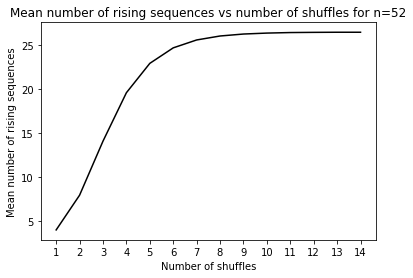

In [14]:
# Plot the mean number of rising sequences per shuffle
k = [k for k in mean_rising_sequences_per_k.keys()][1:]
values = [v for _, v in mean_rising_sequences_per_k.items()][1:]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Mean number of rising sequences vs number of shuffles for n=52")
ax.set_xlabel('Number of shuffles')
ax.set_ylabel('Mean number of rising sequences')
plt.plot(k, values, "black")
plt.show()

# Compare simulation results vs theoretical results

In [26]:
# create dataframe with the frequencies of rising sequences per trial, per shuffle
df_base = pd.DataFrame(index=range(1, 52+1))
df = pd.DataFrame(rising_sequences_per_trial)
r_freqs = df.apply(pd.Series.value_counts)

# calculate probabilities
r_prob = df_base.merge(r_freqs, left_index=True, right_index=True, how="outer").fillna(0) / N_TRIALS
r_prob.columns += 1
r_prob

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,1.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.0,1.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6,0.0,0.0,0.00045,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,0.0,0.0,0.05053,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8,0.0,0.0,0.94902,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
9,0.0,0.0,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
10,0.0,0.0,0.00000,0.00076,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [27]:
# simulation results
simulation_tvd = {}
uniform = stats.uniform(N_CARDS)

for k in range(1, MAX_RIFFLE_SHUFFLES+1):
    var_distance = 0
    list_of_r_probs = r_prob[k].to_list()
    
    for r in range(1, N_CARDS+1):           
        eul = stats.eulerian(N_CARDS, r)
        if eul > 0:
            var_distance += eul * abs(list_of_r_probs[r-1]/eul - uniform)
    
    var_distance *= 0.5    
    simulation_tvd[k] = var_distance

In [28]:
simulation_tvd

{1: 0.9999999999999999,
 2: 0.9999999999999999,
 3: 0.9999999999999999,
 4: 0.9999995334313746,
 5: 0.9240894991746272,
 6: 0.61511050763846,
 7: 0.3353075610651831,
 8: 0.1680400288917257,
 9: 0.08383046656862532,
 10: 0.04271557633749591,
 11: 0.022718697566055285,
 12: 0.010387345340065964,
 13: 0.006809175458291005,
 14: 0.006172116653008013,
 15: 0.004617452220430733}